# Reflecties

In [2]:
from IPython.display import Video
from cursusdef import *

## inleiding

In dit hoofdstuk werken we een aantal voorbeelden uit die aangeven wat de invloed is van niet aangepaste transmissielijnen op de signaal integriteit.
Om hierin inzicht te krijgen is de meest eenvoudige aanpak te kijken wat er gebeurt wanneer een ideale digitale puls wordt aangelegd aan de transmissielijn.
In werkelijkheid moeten we natuurlijk beseffen dat de echte pulsvorm steeds eindige stijg- en daaltijd heeft ([slew-rate](https://en.wikipedia.org/wiki/Slew_rate)) en dat bovendien de stroom die geleverd wordt door de output transistors ook niet constant is. Meer specifiek zal deze stroom afnemen wanneer de spanning over de transistor klein wordt.


Een voorbeeld waarin een meer realistische pulsvorm in detail wordt uitgerekent tonen we hieronder. {Numref}`reflectievideo` toont bovenaan een PCB met baantjes met een karakteristieke impedantie 50 Ohm. Onderaan vergelijken we de situatie waarbij er aldaniet een stukje met karakteristieke impedantie 32 Ohm in de transmissielijn wordt toegevoegd. In beide gevallen vertrekt aan de ingang een puls van 1 V. 
In het geval zonder een baantje met karakteristieke impedantie 32 Ohm meten we aan de uitgang na 80 ps een puls van 953 mV, dus terug bijna 1 V. De maximale reflectie, zoals we die kunnen meten aan de ingang, blijft kleiner dan 9 mV, verwaarloosbaar klein dus. 
In het geval met een baantje met karakteristieke impedantie 32 Ohm meten we aan de uitgang na 80 ps een puls van 813 mV. De maximale reflectie, zoals we die kunnen meten aan de ingang, is 314 mV.

In [4]:
Video("./video/signalintegrity.mp4")

De simulatie in {Numref}`reflectievideo` is numeriek uitgevoerd aan de hand van het simulatiepaket [Ansys](https://www.ansys.com/).

##  Uitwerken van een ladderdiagram

Bij het uitwerken van een ladderdiagram volgen we hoe een ideale stap in aan de ingang loopt over de transmissielijn. Bij elke overgang waar de karakteristieke impedantie verandert, berekenen we de reflectie en de transmissie van het signaal. De reflectie $\rho$ bij de overgang van de karakteristieke impedantie $Z_1$ naar de karakteristieke impedantie $Z_2$ bedraagt:

$$ \rho = \frac{Z_2-Z_1}{Z_2+Z_1}$$

en de transmissie bedraagt $1+\rho$



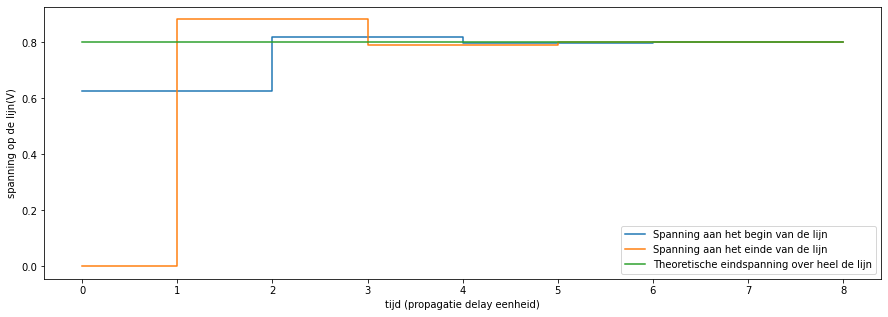

In [13]:
def ladderdiagram (Zo, Zstart,Zend,Tdelay=1,Vpulse=1,numstep=4):
    po_s=(Zstart-Zo)/(Zstart+Zo)
    po_e=(Zend-Zo)/(Zend+Zo)
    V_inf=Vpulse*Zend/(Zend+Zstart)
    tijd=[i*Tdelay  for i in range(2*numstep+1)  for j in range(2)]
    runningpulse=Vpulse*Zo/(Zo+Zstart)
    vstart=[runningpulse,runningpulse]
    veind=[0,0]
    for i in range(numstep):
        veind+=[veind[-1],veind[-1]+runningpulse*(1+po_e)]
        vstart+=[vstart[-1],vstart[-1]]
        runningpulse*=po_e
        veind+=[veind[-1],veind[-1]]
        vstart+=[vstart[-1],vstart[-1]+runningpulse*(1+po_s)]
        runningpulse*=po_s
    fig,ax=plt.subplots(figsize=(15,5))
    ax.plot(tijd,vstart,label="Spanning aan het begin van de lijn")
    ax.plot(tijd,veind,label="Spanning aan het einde van de lijn")
    ax.plot([0,tijd[-1]],[V_inf,V_inf],label="Theoretische eindspanning over heel de lijn")
    ax.set_ylabel('spanning op de lijn(V)');
    if Tdelay==1:
        ax.set_xlabel('tijd (propagatie delay eenheid)')
    else:
        ax.set_xlabel("tijd (s)") 
    plt.legend()
    
ladderdiagram (50, 30,120)

We kunnen het theoretisch ladderdiagramma ook uitwerken voor een praktische propagatievertraging van 1.5ns en een pulse gestuurd door een IC van met een voedingsspanning op de uitgangsbuffers van 3.3 V. De aan-weerstand van de uitgangsbuffers is 10 Ohm (de aanweerstand van de pMOS) en de terminatieweerstand van de lijn is 25 Ohm. In dat geval verloopt de stijgende puls theoretisch zoals in {numref}`ladderPmos`

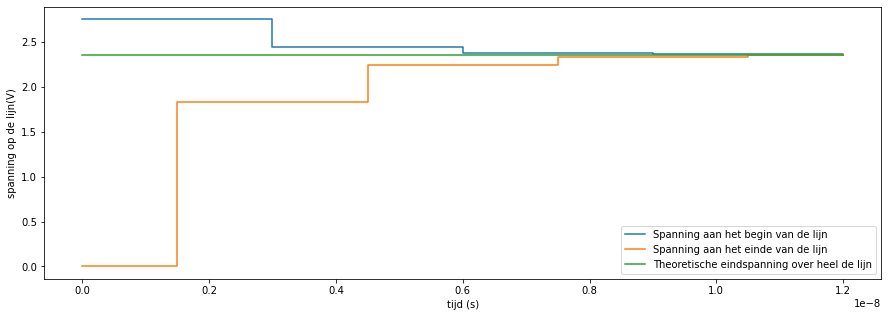

In [19]:
ladderdiagram (50, 10,25,Tdelay=1.5e-9,Vpulse=3.3)